In [203]:
#####################################################################################
#
#   Pennylane Linear Regression
#   @Text: Tjark Ziehm
#   @Creater: Xanadu/Pennylane-Team
#   @Dokumentation: 
#             Quantum Algorithm for Linear Regression - https://arxiv.org/abs/1402.0660 
#   @Science: https://iopscience.iop.org/article/10.1088/1742-6596/1738/1/012063/pdf
#             Quantum Information Processing with Single Photons https://arxiv.org/pdf/quant-ph/0509168.pdf
#             PennyLane: Automatic differentiation of hybrid quantum-classical computations - https://arxiv.org/abs/1811.04968
#             Strawberry Fields: A Software Platform for Photonic Quantum Computing -  https://arxiv.org/abs/1804.03159
#
#   @Leitfaden: https://www.math.uni-bielefeld.de/~sek/funktion/leit03.pdf
#
#    Ziel: Verständiss für lineare Zusammenhänge 
#
#    Möglichkeit der Vertiefung:
#    Basiswissen für die Pflanze und den Datensatz: 
#             https://en.wikipedia.org/wiki/Iris_flower_data_set
#    @DataSet:
#             https://drive.google.com/file/d/1wWUx09kjQ83V-oGH_PdAXHq5huku10kQ/view?usp=sharing
#
#     Ausreißer, Normalisierung und Datenbereinigung sind nicht berücksichtigt ( bzw. schon vorgenommen )
#     Es gibt sehr gute Tools, die für die Modelle wie die lineare Regression optimiert sind:
#             https://docs.scipy.org/
#             https://scikit-learn.org/stable/
#     (Anmerkung: Statsmodel gilt als solide, mittelfristig sind die beiden Tool(meiner Meinung nach) eine bessere Wahl)
#     Diese Tools sind sehr mächtig und bieten auch Tools für die Visualisierung
#
#####################################################################################

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

%matplotlib notebook

## Exkurs OLS

@Documentation: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html


In [2]:
def getOLS(x,y):
    # Konstante zu Prädiktorvariablen hinzufügen
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())
    print("Parameters: ", model.params)
    print("R2: ", model.rsquared)
# Modellzusammenfassung anzeigen
#Diese könnt ihr nun auch unterhalb im Code aufrufen
getOLS(x,y)

NameError: name 'x' is not defined

### Erster Schritt mit Zufallszahlen

Als Beispiel: Wieviele Löffel Kaffe werden eine bestimmte Anzahl an Tassen gebraucht?

In [3]:
''' Hier erstellen wir erstmal ein Datensatz aus Zufallszahlen'''
# 10 numbers from -1 to 1
randomX = np.linspace(0,1,10)

#"Random" Zahlen -Editor
np.random.seed(0)

steigung, versatz = 0.1, 1.2  #Was wäre besser zu schreiben
zufallswert =  np.random.randn(10)
streuung = 0.17 * zufallswert

#Linear Regression formula
y_data = steigung * randomX + versatz + streuung


In [7]:
optimizationSteps = 200

#Optimization
opt = qml.GradientDescentOptimizer(0.1)

#Defining the starting values
init_weights = [0.1, 0.1]
weights = init_weights

In [5]:
kostenEntwicklung = np.zeros((1, 1))

def y_prediction(weights):
    return weights[0] * randomX + weights[1]

'''
Bedeutung und Funktionsweise: https://de.wikipedia.org/wiki/Standardfehler_der_Regression
#RMSE Root Mean Squared Error
'''
def cost(weights):
    y_prediction2 = y_prediction(weights)
    rmse = np.mean((y_data - y_prediction2) ** 2)
    return rmse

for step in range(optimizationSteps):
    weights = opt.step(cost, weights)
    kostenValue = cost(weights)
    np.append(kostenEntwicklung, kostenValue, axis = 1)
    #print(kostenEntwicklung)
    #print(cost(weights))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

In [6]:
plt.scatter(randomX,y_data)
plt.plot(randomX, y_prediction(weights),'b')

<IPython.core.display.Javascript object>

In [5]:
##################################---Vertiefung---#######################################################
#
#   Erweiterter DatenSatz: iris.csv https://drive.google.com/file/d/1wWUx09kjQ83V-oGH_PdAXHq5huku10kQ/view?usp=sharing
#   @Documentation: https://numpy.org/doc/stable/user/basics.io.genfromtxt.html?highlight=np%20genfromtxt
#   @ Iris-Classes: Versicolor & Setosa
#
#
#########################################################################################################

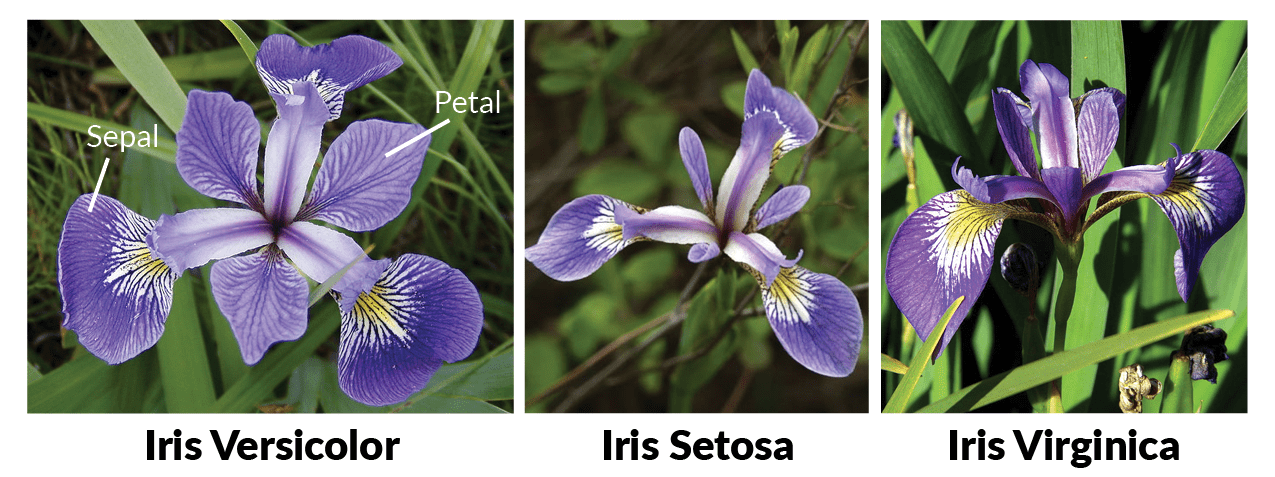

In [9]:
'''
autostrip: Wenn eine Zeile in eine Reihe von Zeichenketten zerlegt wird, werden die einzelnen Einträge 
standardmäßig nicht von führenden und nachfolgenden Leerzeichen befreit. 
Dieses Verhalten kann überschrieben werden, indem das optionale Argument autostrip auf den Wert True 
gesetzt wird.
skip_header: Manchmal kann es erforderlich sein, die Spaltennamen anhand der Daten selbst zu definieren.
In diesem Fall müssen wir das Schlüsselwort names mit dem Wert True verwenden. Die Namen werden dann aus 
der ersten Zeile (nach den skip_header-Zeilen) gelesen, auch wenn die Zeile auskommentiert ist.
'''
dataset  = np.genfromtxt('./DataSets/iris.csv',delimiter=',', dtype=float, autostrip=True, skip_header=1, usecols=(0,1,2,3))

'''
Alternativ kann man den Datensatz "komplett" lassen und nicht über die Parameter weg schneiden.
Darauf folgt dann der "Arbeitsdatensatz". Vorteil ist, dass ihr euch den originalen Datensatz mit
Namen etc anschauen könnt. Dafür müssen unterhalb dann die Variablen-Namen von dataset auf workDataSet geändert werden.
'''
#dataset  = np.genfromtxt('iris.csv',delimiter=',')
#workDataSet = dataset[1::,0:3]

'''
For a deeper understanding of numpy make the examples for basic array operations
If TLTR -> search "Indexing, Slicing and Iterating"
@Link: https://numpy.org/doc/stable/user/quickstart.html
'''
for row in dataset:
    print(row)
    
    
#Split the dataset in two random datasets  
np.random.shuffle(dataset) 
training, test = dataset[0:75], dataset[75:151]

#for row in test:
#    print(row)

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]
[4.9 3.1 1.5 0.1]
[5.4 3.7 1.5 0.2]
[4.8 3.4 1.6 0.2]
[4.8 3.  1.4 0.1]
[4.3 3.  1.1 0.1]
[5.8 4.  1.2 0.2]
[5.7 4.4 1.5 0.4]
[5.4 3.9 1.3 0.4]
[5.1 3.5 1.4 0.3]
[5.7 3.8 1.7 0.3]
[5.1 3.8 1.5 0.3]
[5.4 3.4 1.7 0.2]
[5.1 3.7 1.5 0.4]
[4.6 3.6 1.  0.2]
[5.1 3.3 1.7 0.5]
[4.8 3.4 1.9 0.2]
[5.  3.  1.6 0.2]
[5.  3.4 1.6 0.4]
[5.2 3.5 1.5 0.2]
[5.2 3.4 1.4 0.2]
[4.7 3.2 1.6 0.2]
[4.8 3.1 1.6 0.2]
[5.4 3.4 1.5 0.4]
[5.2 4.1 1.5 0.1]
[5.5 4.2 1.4 0.2]
[4.9 3.1 1.5 0.2]
[5.  3.2 1.2 0.2]
[5.5 3.5 1.3 0.2]
[4.9 3.6 1.4 0.1]
[4.4 3.  1.3 0.2]
[5.1 3.4 1.5 0.2]
[5.  3.5 1.3 0.3]
[4.5 2.3 1.3 0.3]
[4.4 3.2 1.3 0.2]
[5.  3.5 1.6 0.6]
[5.1 3.8 1.9 0.4]
[4.8 3.  1.4 0.3]
[5.1 3.8 1.6 0.2]
[4.6 3.2 1.4 0.2]
[5.3 3.7 1.5 0.2]
[5.  3.3 1.4 0.2]
[7.  3.2 4.7 1.4]
[6.4 3.2 4.5 1.5]
[6.9 3.1 4.9 1.5]
[5.5 2.3 4.  1.3]
[6.5 2.8 4.6 1.5]
[5.7 2.8 4

## Auswahl der zu überprüfenden Varialen treffen

In [10]:
'''
Training[ gib mir alle Werte, aus dieser Spalte ] 
'''
x = training[:, 3]
y = training[:, 2]

#feature normalization
# input variable divided by maximum value among input values in X
#x = x/(np.max(x)) 
steigung = 4
versatz = 1
plt.plot(x, y, 'yo', x, steigung*x+versatz, '--k') 


#m(Steigung) = slope, b (Versatz)=intercept
#The last number defines the degree of the polynomial you want to fit.
model = np.polyfit(x, y, 1)

<IPython.core.display.Javascript object>

In [11]:
plt.ylabel('Y-Wert')
plt.xlabel('X-Wert')

plt.title('Datenvisualisierung')

plt.scatter(x, y)


<IPython.core.display.Javascript object>

In [12]:
getOLS(x, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     762.7
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.21e-40
Time:                        15:30:06   Log-Likelihood:                -54.189
No. Observations:                  75   AIC:                             112.4
Df Residuals:                      73   BIC:                             117.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0898      0.123      8.886      0.0

Right and wrong .... https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

## Cost or SSE ( sum of squared error )

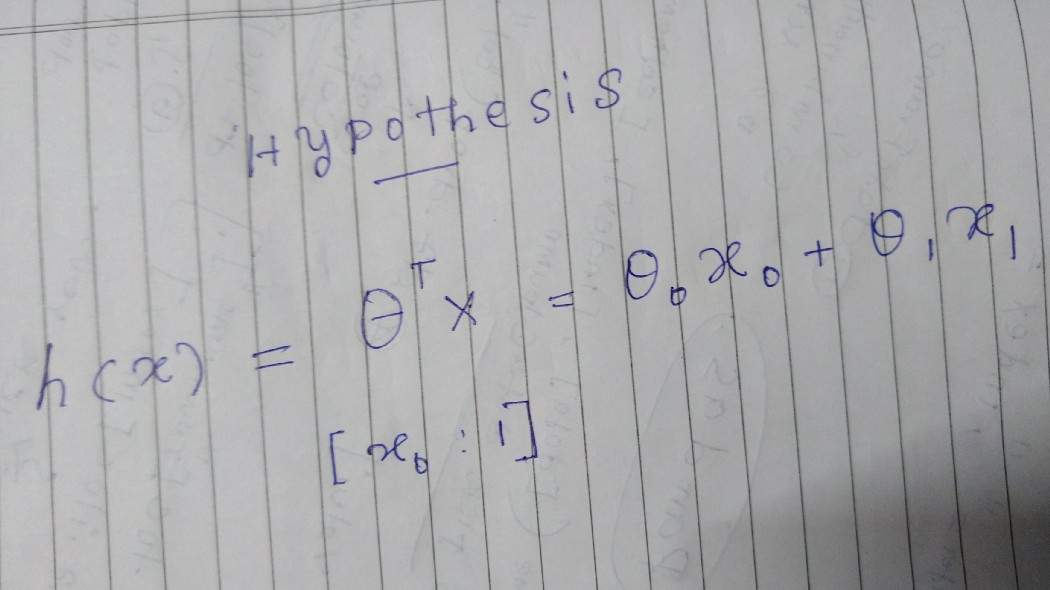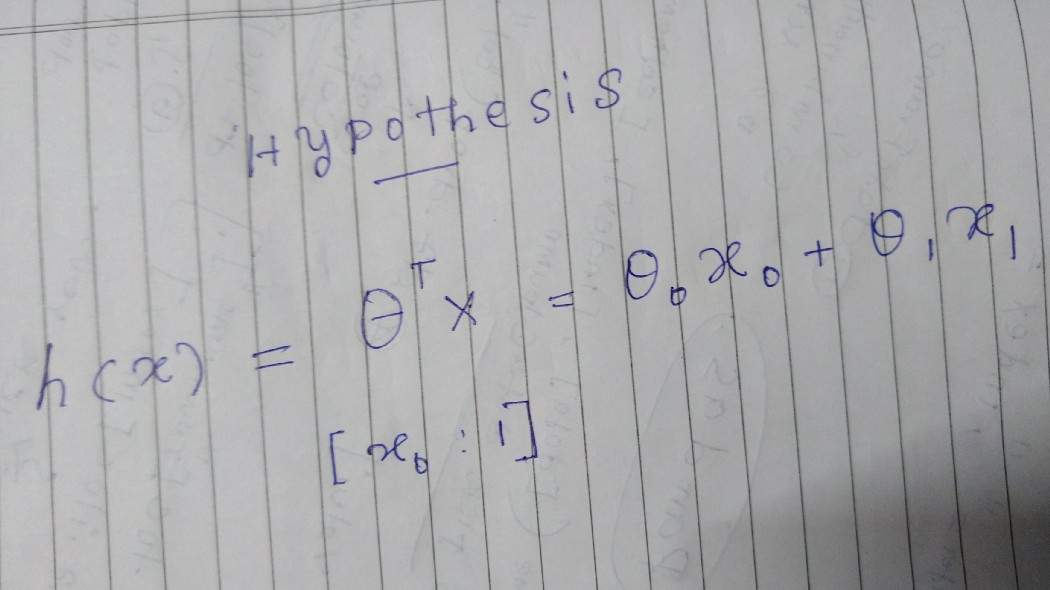

In [13]:
def computecost(x,y,theta):    
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

In [14]:
#initialising parameter
m = np.size(y)
X = x.reshape([75,1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])
print(theta,'\n',m)

[[0.]
 [0.]] 
 75


In [15]:
print(computecost(x,y,theta))

727.61


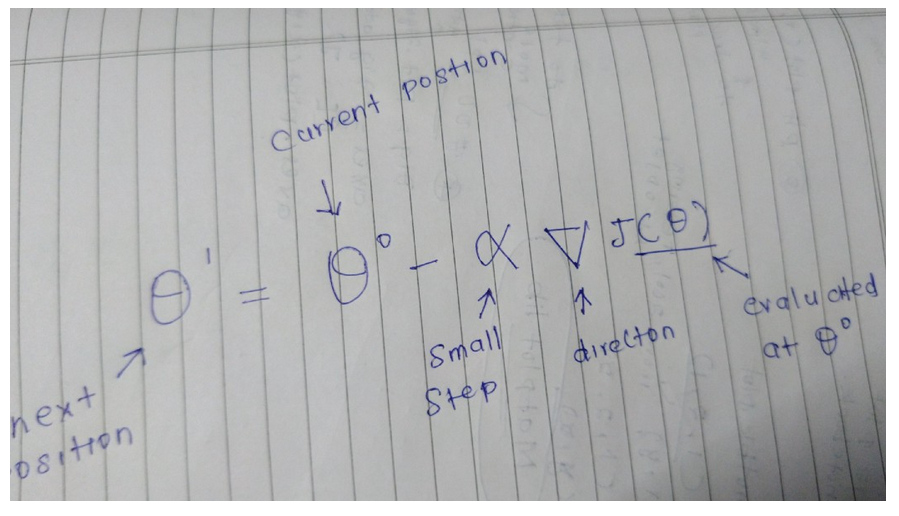

In [16]:
###################################################################################################
#
#    @parameter: 
#                alpha:
#                iteration:
#
###################################################################################################
def gradient(x,y,theta):
    
    alpha = 0.00001
    iteration = 2000#gradient descend algorithm
    J_history = np.zeros([iteration, 1]);
    
    for iter in range(0,2000):
        
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:,0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:,1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum(((x @ theta)-y)**2))   #compute J value for each iteration 
    return theta, J_history

In [17]:
## cost or SSE 
theta , J = gradient(x,y,theta)
print(J)

[[724.69211275]
 [721.78804772]
 [718.89774447]
 ...
 [268.21009196]
 [268.25766403]
 [268.30521575]]


In [18]:
#plot linear fit for our theta
plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')

#plt.axis([0,1,3,7])
plt.ylabel('Y-Value')
plt.xlabel('X-Value')

#plt.legend(['Y-Value','LinearFit'])
plt.title('Data-Analyse')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

In [19]:
#normalising the input value, 1 is for intercept term so not need to normalise
normalizeInterceptValue = 1
inputX = 2

predictionForY = [normalizeInterceptValue,(inputX/np.max(x[:,0]))] @ theta


print(predictionForY)

[6.44732087]


## Check out the Quality of gradient descent result

In [20]:
#visualising J (theta0 , theta1)
theta0_values = np.linspace(-5, 10, 100).reshape(1,100)
theta1_values = np.linspace(-5, 10, 100).reshape(1,100)

#initialise J value to matrix of 0
J_values = np.zeros([np.size(theta0_values),np.size(theta1_values)])#fill J_vals

for i in range(0,np.size(theta0_values)):
    for j in range(0,np.size(theta1_values)):
        t = np.array([theta0_values[:,i],theta1_values[:,j]])
        J_values[i,j] = computecost(x, y, t)
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_values = J_values.T

In [25]:
#surface plot for covergence
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111, projection ='3d')

ax.plot_surface(theta0_values, theta1_values, J_values)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J_values')

plt.show()

<IPython.core.display.Javascript object>

In [44]:
from matplotlib import animation, rc
from IPython.display import HTML

In [45]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [46]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


In [49]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [50]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [51]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [52]:
anim

/home/datascience/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


RuntimeError: Requested MovieWriter (ffmpeg) not available

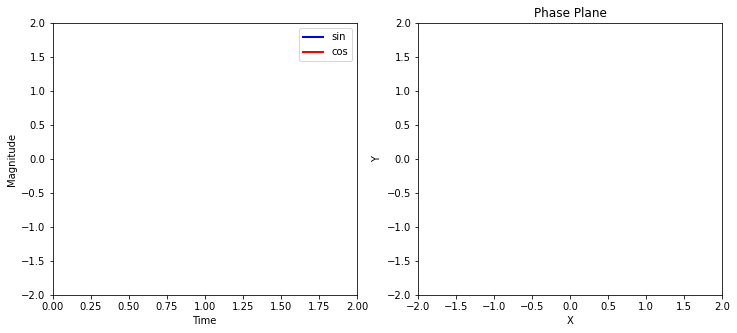

In [16]:
# https://jckantor.github.io/CBE30338/A.03-Animation-in-Jupyter-Notebooks.html
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);


In [12]:
# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [13]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)


In [15]:
from IPython.display import HTML
HTML(anim.to_html5_video())
